## **Datensammlung**

Sammeln Sie Daten für alle Gebrauchtwagenangebote für mindestens 5 verschiedene Hersteller Ihrer Wahl (insgesamt mindestens 30.000 Stichproben) von einem Gebrauchtwagenportal Ihrer Wahl.

Gebrauchtwageninternetportale sind z.B.:

- https://www.exchangeandmart.co.uk/
- https://www.autoscout24.de/

Das bedeutet: „scrapen“ Sie die ausgewählte Webseite (z.B. mit den Python Modulen „Requests“ und „BeautifulSoup“) und sammeln Sie dabei alle verfügbaren Informationen zu den Details der Anzeigen (Marke, Modell, Preis, Baujahr, Hubraum, Kilometerstand,…) und Spezifikationen der Fahrzeuge (Farbe, Türen, Sitze, Motorleistung, Höchstgeschwindigkeit, Beschleunigung,…). Speichern Sie die so gewonnenen Rohdaten als CSV-Dateien (eine Datei pro Hersteller) ab.

# TODO
* almancaya çevrilecek
* daha çok örnek eklenecek
* yıl kategorik mi numerik mi kabul edilecek tartışılacak ona göre visualization kısmı değiştirilebilir - %99 kategorik yapmamız lazım değiştirilse iyi olur
* df = df_filtered yerine df = pd.DataFrame(df_filtered)
* Wurden die wichtigsten Fragen zum Datensatz beantwortet (z. B. Datenverteilung, Korrelationen, Trends, Muster)?
* Wurden zusätzliche Merkmale durch Feature-Engineering identifiziert?
* hipotez 3 tekrar bakılacak
* p değeri tekil mi ortalaması mı olacak

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
headers = ['brand','model', 'price', 'year', 'transmission', 'fuelConsumption', 'tax', 'mileage', 'fuelType', 'color', 'variant']
df = pd.DataFrame(columns = headers)


In [4]:
colors = ['beige', 'black', 'blue', 'bronze', 'brown', 'gold', 'green', 'grey', 'orange', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow']
cars = ['toyota', 'volvo', 'audi', 'bmw', 'citroen', 'ford', 'honda', 'hyundai', 'kia', 'nissan']
url = "https://www.exchangeandmart.co.uk/used-cars-for-sale/"

In [5]:
for color in colors:
    for pageNumber in range(1,100):
        for car in cars:
            currentUrl = url + car + "/any-distance-from-se15-1la/colour-" + color + '/page' + str(pageNumber)
            page = requests.get(currentUrl)
            soup = BeautifulSoup(page.text, 'html')
            items = soup.find_all('div', attrs={"class" : "result-item"})

            if items[0].find('span', attrs={"class" : "ttl_mk"}) is None:
                break
            
            for item in items:
                brand = item.find('span', attrs={"class" : "ttl_mk"}).text
                model = item.find('span', attrs={"class" : "ttl_md"}).text
                price = item.find('span', attrs={"class" : "price--primary"}).text
                variant = item.find('div', attrs={"class" : "result-item__variant"}).text
                keyDetails = item.find_all('p', attrs={"class" : "key-details__item"})
                if(len(keyDetails) < 6):
                    continue
                year = keyDetails[0].text
                transmission = keyDetails[1].text
                fuelConsumption = keyDetails[2].text
                tax = keyDetails[3].text
                mileage = keyDetails[4].text
                fueltype = keyDetails[5].text
                data = [brand, model, price, year, transmission, fuelConsumption, tax, mileage, fueltype, color, variant]
                df.loc[len(df)-1] = data

KeyboardInterrupt: 

In [6]:
df.to_csv('AllData.csv')
groupedDFs = [v for k, v in df.groupby('brand')]
for brandDF in groupedDFs:
    brandDF.to_csv(''+brandDF.brand.iloc[0]+'.csv') 

## **Datenbereinigung**

Importieren Sie den Datensatz in ein Jupyter Notebook mit Python Umgebung. Sichten Sie die Daten und führen Sie eine Datenbereinigung durch.

**1.Was beschreiben die Daten?**

Wir können die auf der Website verfügbaren Daten über Autos scrapen. um einen Datensatz zu erstellen. Zu diesen Features der Daten gehören Marke, Modell, Preis, Jahr, Getriebe, Kraftstoffverbrauch, Steuer, Kilometerstand, Kraftstoffart, Farbe und Variante.

**2.Warum sind die Daten relevant oder interessant?**

Die Relevanz oder das Interesse der Daten hängt vom Kontext der Nutzung ab. Hier sind vier mögliche Gründe, warum der zur Verfügung gestellte Datensatz über Autos als relevant oder interessant angesehen werden kann:

* **Marktanalyse:** Die Daten könnten zur Analyse des Automarktes verwendet werden, um Preistrends, beliebte Modelle und den Einfluss von Faktoren wie Kraftstoffart oder Getriebe auf die Preisgestaltung zu verstehen.
* **Entscheidungsfindung:** Personen, die Autos kaufen oder verkaufen möchten, können den Datensatz nutzen, um Entscheidungen auf der Grundlage historischer Preistrends, des Kilometerstandes und anderer Features zu treffen.
* **Politik und Besteuerung:** Für Regierungen können die Daten nützlich sein, um die Steuerpolitik in Bezug auf Autos zu bewerten, insbesondere im Hinblick auf Faktoren wie Kraftstoffverbrauch oder Emissionen.
* **Einblicke in die Automobilbranche:** Unternehmen der Automobilindustrie können die Daten nutzen, um Einblicke in die Präferenzen der Verbraucher, die Beliebtheit der Modelle und die Preisstrategien der Wettbewerber zu gewinnen.

**3.Welche Daten sind enthalten?**

* Die Features über Autos sind Marke, Modell, Preis, Jahr, Getriebe, Kraftstoffverbrauch, Steuern, Kilometerstand, Kraftstofftyp, Farbe und Variante. 

* Einige von Features sind **kategorisch (oder qualitativ)**. Zum Beispiel: Farbe, Jahr, Marke 

* Einige von Features  sind **numerisch (oder quantitativ)** . Zum Beispiel: Preis, Steuer, Kraftstoffverbrauch

**4.Wie sind die Daten formatiert?**

Die gescrapten Daten enthalten Zeichenketten (String) und numerische (float64) Formate. Nur das Jahr wird als float64 gespeichert, die anderen Daten sind Strings. Daher sollten sie vor der Verwendung richtig vorbereitet und formatiert werden.

**5.Welche Schritte haben Sie unternommen, um die Daten zu bereinigen?**

Wir haben diese Operationen durchgeführt, um die Daten zu bereinigen: 
* Datenbereinigung, wie z. B. Behandlung fehlender Werte 
* Behandlung von Ausreißern
* Konvertierung von Datentypen
* Behandlung von Inkonsistenzen

**6.Gibt es Ausreißer, Duplikate oder fehlende Werte?**

* Ausreißer sind Werte, die deutlich von der Mehrheit abweichen. Wir identifizierten und behandelten die Ausreißer in unserem Datensatz mithilfe des z-Scores.

* Um doppelte Zeilen zu entfernen und sicherzustellen, dass es keine doppelten Zeilen gibt, haben wir die Methode **Pandas dataframe.drop_duplicates()** verwendet.

* Um mit fehlenden Werten umzugehen, haben wir die Werte durch Imputation richtig aufgefüllt oder sie direkt gelöscht. 

**7.Gibt es Fehler im Datensatz?**

Bei der Formatierung und Konvertierung der Daten mit der Methode replace() für Strings haben wir auch auf Fehler und Inkonsistenzen geprüft. Dank der ordnungsgemäß konfigurierten Website sind wir nicht auf falsche Daten getroffen.

**8.Sind die Daten konsistent?**

Um die Konsistenz des Datensatzes zu bestimmen, haben wir verschiedene Aspekte des Datensatzes bewertet. Hier sind die Schritte, die wir zur Bewertung der Datenkonsistenz durchgeführt haben:

***Einheitlichkeit der Datentypen:***

Wir haben überprüft, ob die Datentypen innerhalb jeder Spalte konsistent sind. So haben wir zum Beispiel sichergestellt, dass alle Werte in der Spalte "year" numerisch sind und gültige Jahre darstellen.

***Kategorische Werte:***

Wir haben kategorische Variablen wie "transmission", "fuelType", and "color".  untersucht. Es wurde sichergestellt, dass die Kategorien konsistent sind und keine Abweichungen aufgrund von Rechtschreibfehlern oder Synonymen vorliegen.

***Numerische Werte:***

Bei quantitativen Merkmalen wie "price", "mileage" und "fuelConsumption" haben wir den Wertebereich untersucht. Wir haben auf Ausreißer geprüft, die auf Fehler oder Unstimmigkeiten hindeuten können.

***Cross-Column Beziehungen:***

Wir haben die Beziehungen zwischen den Spalten untersucht. So haben wir beispielsweise überprüft, ob das "year" eines Autos mit dem "mileage" konsistent ist, und ob das "transmission" mit dem "fuelType" zusammenpasst.

***Fehlende Werte:***

Wir haben geprüft, ob es konsistente Muster bei fehlenden Werten gibt. Fehlende Werte können auf Probleme bei der Datenerfassung oder Dateneingabe hinweisen.

***Logische Konsistenz:***

Wir haben die logische Konsistenz der Daten bewertet. Beispielsweise wurde es überprüft, ob die Steuerwerte mit dem Jahr des Fahrzeugs übereinstimmen.

**9.Welche Besonderheiten sind Ihnen aufgefallen?**
*TODO*
* Die Steuer für die meisten Firmenwagen beträgt 0£.

In [311]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm

pd.options.mode.chained_assignment = None  # default='warn'
# check https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [312]:
df= pd.read_csv('AllData.csv')
df = df.drop('Unnamed: 0', axis=1)
df.rename(columns = {'fueltype':'fuelType'}, inplace = True) 
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            37147 non-null  object 
 1   model            37147 non-null  object 
 2   price            37147 non-null  object 
 3   year             37056 non-null  float64
 4   transmission     37147 non-null  object 
 5   fuelConsumption  37147 non-null  object 
 6   tax              37147 non-null  object 
 7   mileage          37147 non-null  object 
 8   fuelType         37147 non-null  object 
 9   color            37147 non-null  object 
 10  variant          36549 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.1+ MB


(37147, 11)

In [313]:
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant
0,Toyota,Aygo,"£20,430",2022.0,Automatic,56.5 mpg,Tax: £180,"Mileage: 4,497",Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto
1,Toyota,Aygo,"£17,998",2023.0,Automatic,56.5 mpg,Tax: £180,"Mileage: 2,345",Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
2,Toyota,Aygo,"£14,225",2022.0,Manual,58.9 mpg,Tax: £180,"Mileage: 36,729",Petrol,beige,o X 1.0 VVT-i Edge 5dr
3,Toyota,Aygo,"£18,431",2023.0,Automatic,56.5 mpg,Tax: £180,"Mileage: 3,620",Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
4,Toyota,Aygo,"£17,159",2022.0,Manual,57.7 mpg,Tax: £180,"Mileage: 4,000",Petrol,beige,o X 1.0 VVT-i Exclusive 5dr


In [314]:
#Formatting the price data / Bereinigung der Preisdaten
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('£','')
df['price'] = pd.to_numeric(df['price'])
#Formatting the year data 
df["year"].dropna(inplace=True)
df['year'] = df['year'].astype('int', errors='ignore')
#Formatting the fuelConsumption data 
df['fuelConsumption'] = df['fuelConsumption'].str.replace(' mpg','')
df['fuelConsumption'] = pd.to_numeric(df['fuelConsumption'])
#Formatting the Tax data 
df['tax'] = df['tax'].str.replace('Tax: n/a','')
df['tax'] = df['tax'].str.replace('Tax: £','')
df['tax'] = pd.to_numeric(df['tax'])
#Formatting the mileage data 
df['mileage'] = df['mileage'].str.replace(',','')
df['mileage'] = df['mileage'].str.replace('Mileage: ','')
#df['mileage'] = df['mileage'].str.replace('Mileage: Unknown','')
df['mileage'] = df['mileage'].str.replace('Unknown','')
df['mileage'] = pd.to_numeric(df['mileage'])

In [315]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            37147 non-null  object 
 1   model            37147 non-null  object 
 2   price            37147 non-null  int64  
 3   year             37056 non-null  float64
 4   transmission     37147 non-null  object 
 5   fuelConsumption  37147 non-null  float64
 6   tax              36646 non-null  float64
 7   mileage          37136 non-null  float64
 8   fuelType         37147 non-null  object 
 9   color            37147 non-null  object 
 10  variant          36549 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 3.1+ MB


(37147, 11)

In [316]:
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr


In [317]:
pd.isnull(df).sum()

brand                0
model                0
price                0
year                91
transmission         0
fuelConsumption      0
tax                501
mileage             11
fuelType             0
color                0
variant            598
dtype: int64

In [318]:
# Behandlung von fehlenden Werte
df["tax"].fillna(0, inplace=True)
df["mileage"].fillna(df["mileage"].mean(), inplace=True)
df["year"].fillna(df["year"].mean(), inplace=True)
df["variant"].fillna("unknown variant", inplace=True)

In [319]:
pd.isnull(df).sum()

brand              0
model              0
price              0
year               0
transmission       0
fuelConsumption    0
tax                0
mileage            0
fuelType           0
color              0
variant            0
dtype: int64

In [320]:
# Behandlung der Duplikate
display(df.drop_duplicates())
df.info()
df.shape

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr
...,...,...,...,...,...,...,...,...,...,...,...
37142,Toyota,Yaris,28650,2022.0,Automatic,65.7,170.0,2013.0,Hybrid,yellow,s Cross 1.5 Hybrid Dynamic AWD 5dr CVT
37143,Toyota,Aygo,7116,2016.0,Manual,69.0,0.0,50611.0,Petrol,yellow,1.0 VVT-i x-cite 3 Yellow Bi-Tone Hatchback 5d...
37144,Toyota,Yaris,24498,2022.0,Automatic,65.7,170.0,18002.0,Petrol,yellow,s 1.5 VVT h Dynamic E CVT Euro 6 (s/s) 5dr
37145,Toyota,Aygo,7500,2016.0,Manual,69.0,0.0,45336.0,Petrol,yellow,o 1.0 VVT-i X-Cite 3 5dr


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            37147 non-null  object 
 1   model            37147 non-null  object 
 2   price            37147 non-null  int64  
 3   year             37147 non-null  float64
 4   transmission     37147 non-null  object 
 5   fuelConsumption  37147 non-null  float64
 6   tax              37147 non-null  float64
 7   mileage          37147 non-null  float64
 8   fuelType         37147 non-null  object 
 9   color            37147 non-null  object 
 10  variant          37147 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 3.1+ MB


(37147, 11)

In [321]:
# Behandlung der Ausreißer
# Kalkulieren von 'Z-score' für jeden Feature
df["z_score_price"]=(df["price"] - df["price"].mean())/df["price"].std()
df["z_score_year"]=(df["year"] - df["year"].mean())/df["year"].std()
df["z_score_fuelConsumption"]=(df["fuelConsumption"] - df["fuelConsumption"].mean())/df["fuelConsumption"].std()
df["z_score_tax"]=(df["tax"] - df["tax"].mean())/df["tax"].std()
df["z_score_mileage"]=(df["mileage"] - df["mileage"].mean())/df["mileage"].std()
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant,z_score_price,z_score_year,z_score_fuelConsumption,z_score_tax,z_score_mileage
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto,0.105113,0.848492,0.034788,0.19661,-1.002342
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,-0.119828,1.132588,0.034788,0.19661,-1.078382
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr,-0.468799,0.848492,0.122478,0.19661,0.136568
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,-0.079779,1.132588,0.034788,0.19661,-1.033330
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr,-0.197428,0.848492,0.078633,0.19661,-1.019903


In [322]:
# Löschen der Ausreißer
df_filtered = df[
    (df["z_score_price"] > -3) & (df["z_score_price"] < 3) &
    (df["z_score_year"] > -3) & (df["z_score_year"] < 3) &
    (df["z_score_fuelConsumption"] > -3) & (df["z_score_fuelConsumption"] < 3) &
    (df["z_score_tax"] > -3) & (df["z_score_tax"] < 3) &
    (df["z_score_mileage"] > -3) & (df["z_score_mileage"] < 3)
]

df_filtered.drop(["z_score_price", "z_score_year", "z_score_fuelConsumption", "z_score_tax", "z_score_mileage"], axis=1, inplace=True)

# Check if it's correct
df = pd.DataFrame(df_filtered)

In [323]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34422 entries, 0 to 37146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            34422 non-null  object 
 1   model            34422 non-null  object 
 2   price            34422 non-null  int64  
 3   year             34422 non-null  float64
 4   transmission     34422 non-null  object 
 5   fuelConsumption  34422 non-null  float64
 6   tax              34422 non-null  float64
 7   mileage          34422 non-null  float64
 8   fuelType         34422 non-null  object 
 9   color            34422 non-null  object 
 10  variant          34422 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 3.2+ MB


(34422, 11)

In [324]:
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr


## **Datenexploration, Statistische Analyse und Visualisierung**

Nutzen Sie Ihr Jupyter Notebook, um eine erste Datenexploration und -visualisierung durchzuführen. Beantworten Sie Schlüsselfragen zum Datensatz, verstehen Sie die Verteilung der Daten und erkennen Sie Trends und Muster. Wenden Sie statistische Verfahren an, um Erkenntnisse aus den Daten zu gewinnen.

### Für numerische Features

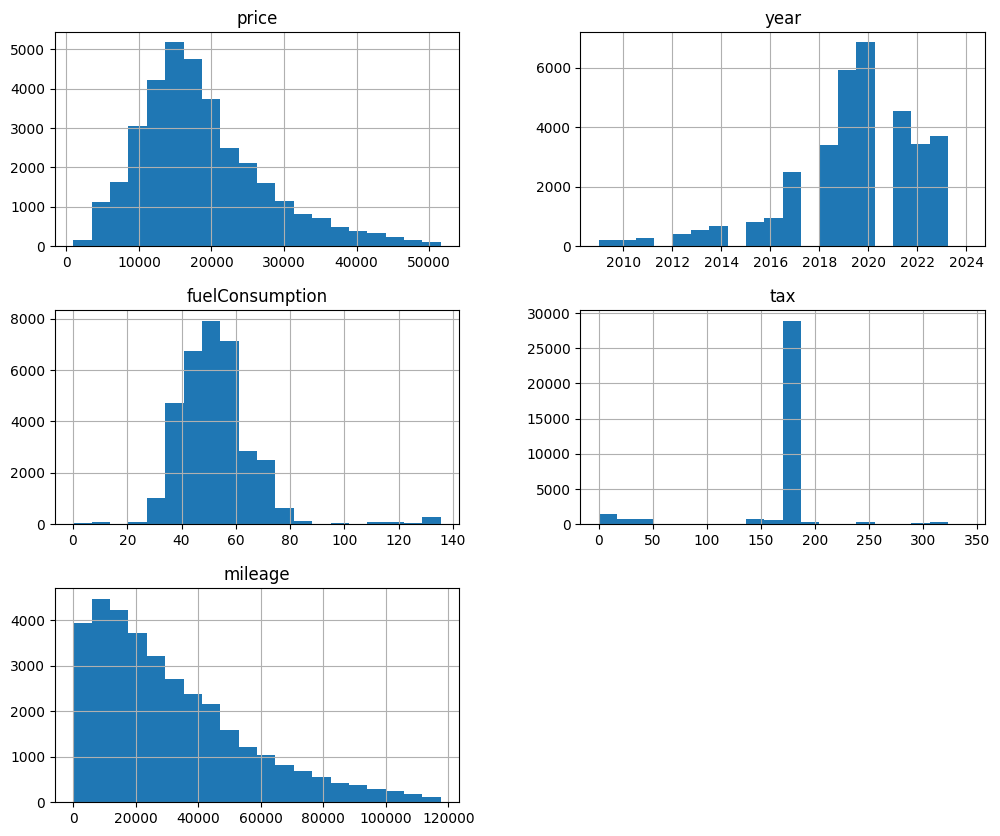

              price          year  fuelConsumption           tax  \
count  34422.000000  34422.000000     34422.000000  34422.000000   
mean   18722.241648   2019.320177        52.486834    164.966010   
std     8745.752770      2.741570        14.489729     49.374714   
min      950.000000   2009.000000         0.100000      0.000000   
25%    12795.000000   2018.000000        44.100000    170.000000   
50%    16999.000000   2020.000000        51.400000    180.000000   
75%    23090.000000   2021.000000        58.900000    180.000000   
max    51600.000000   2024.000000       135.500000    340.000000   

             mileage  
count   34422.000000  
mean    30975.120192  
std     24313.262239  
min         1.000000  
25%     12000.000000  
50%     25001.500000  
75%     44000.000000  
max    117581.000000  

          price    year  fuelConsumption    tax  mileage
median  16999.0  2020.0             51.4  180.0  25001.5


In [325]:
# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Display summary statistics
print(df.describe())
print()

# Display  median
print(df[["price", "year", "fuelConsumption", "tax", "mileage"]].agg(['median']))

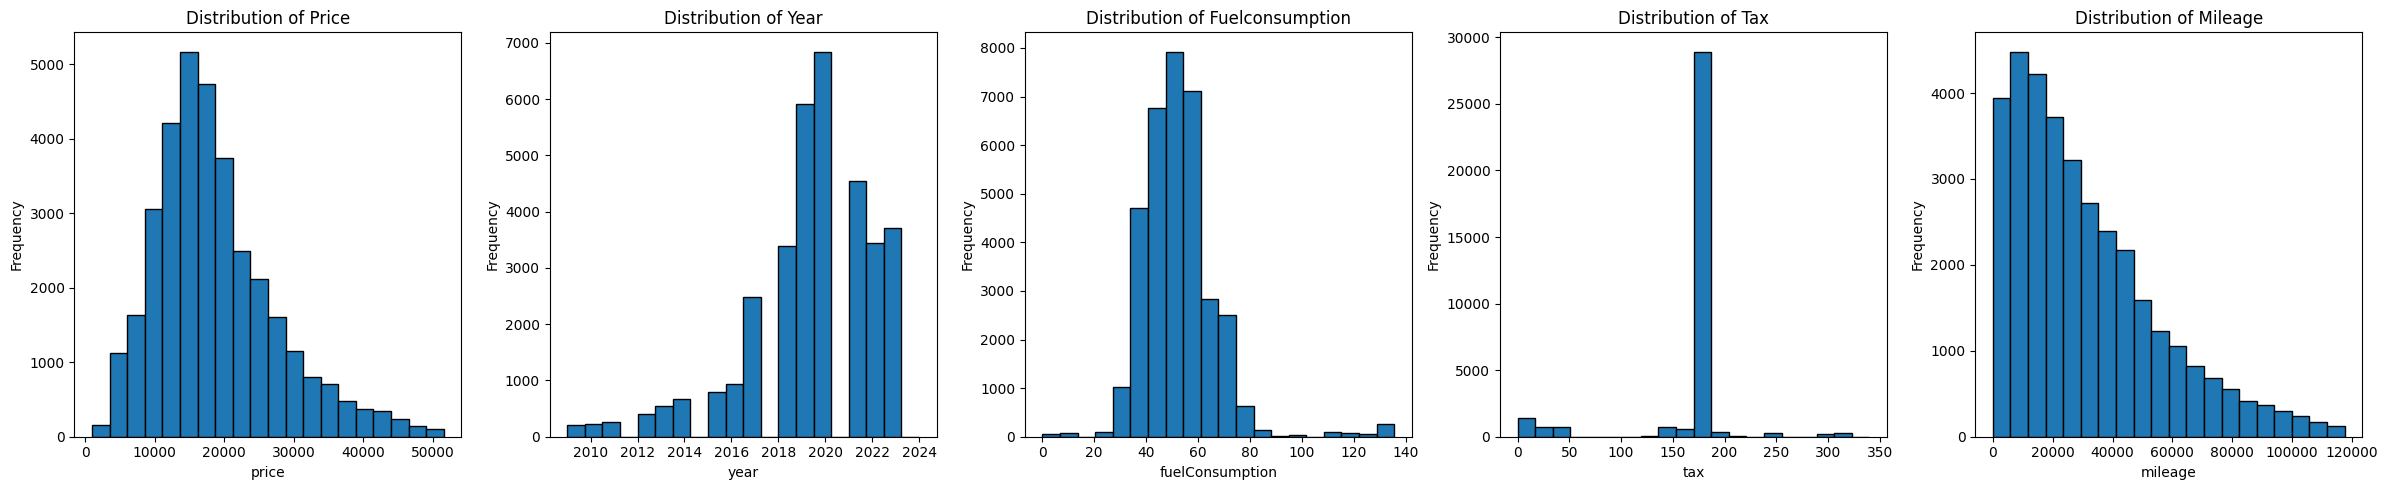

In [326]:
import matplotlib.pyplot as plt

# Numerische Spalten auswählen
numerical_columns = ["price", "year", "fuelConsumption", "tax", "mileage"]

# Subplots erstellen
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(24, 5))

# Histogramme aufzeichnen
for i, column in enumerate(numerical_columns):
    df[column].plot(kind="hist", bins=20, edgecolor="black", ax=axes[i])
    axes[i].set_title(f"Distribution of {column.capitalize()}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

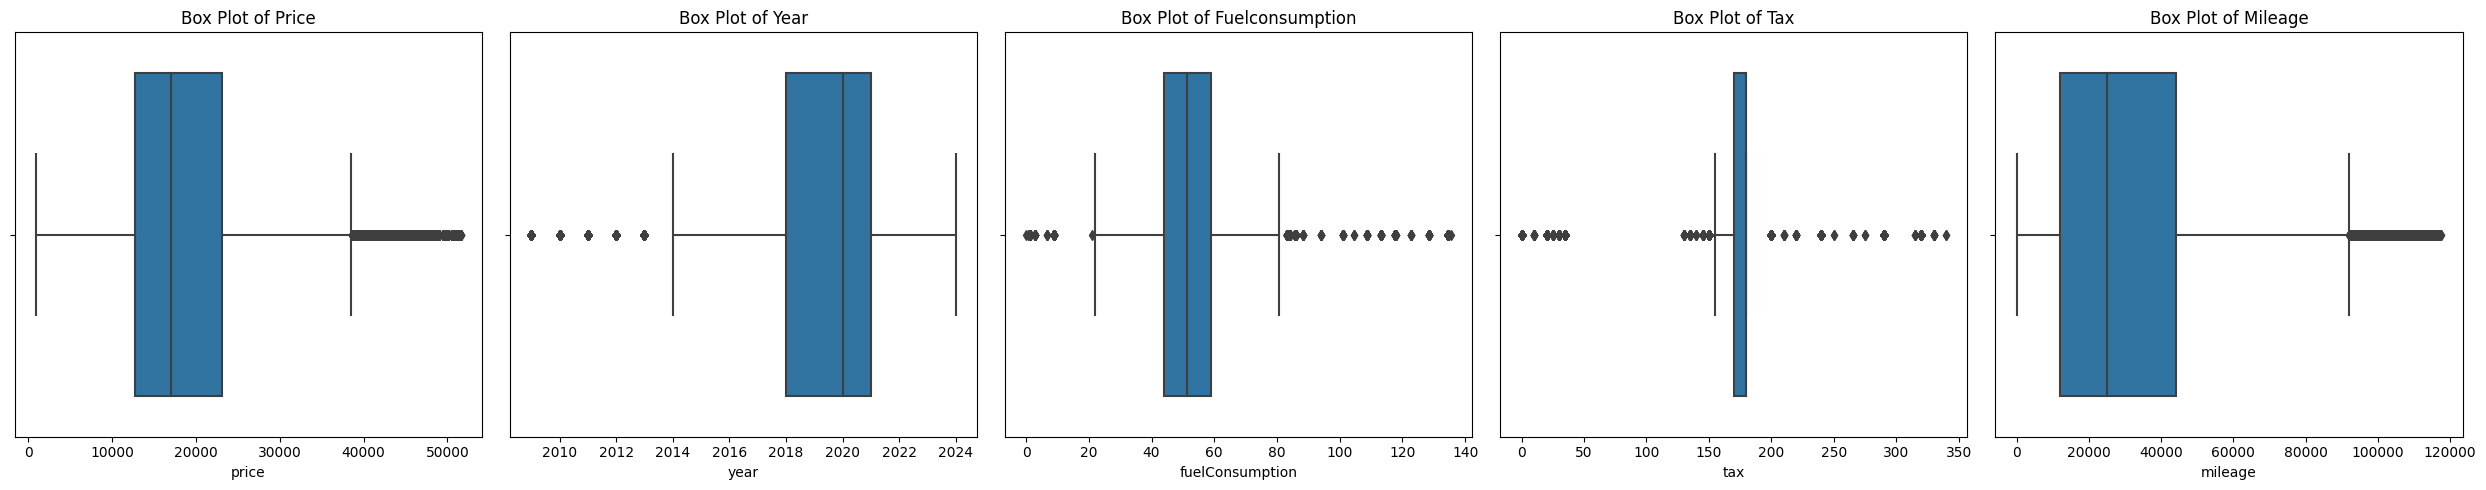

In [327]:
# Numerische Spalten auswählen
numerical_columns = ["price", "year", "fuelConsumption", "tax", "mileage"]

# Subplots erstellen
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(25, 5))

# Boxplots aufzeichnen
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column.capitalize()}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

### Für kategorische Features

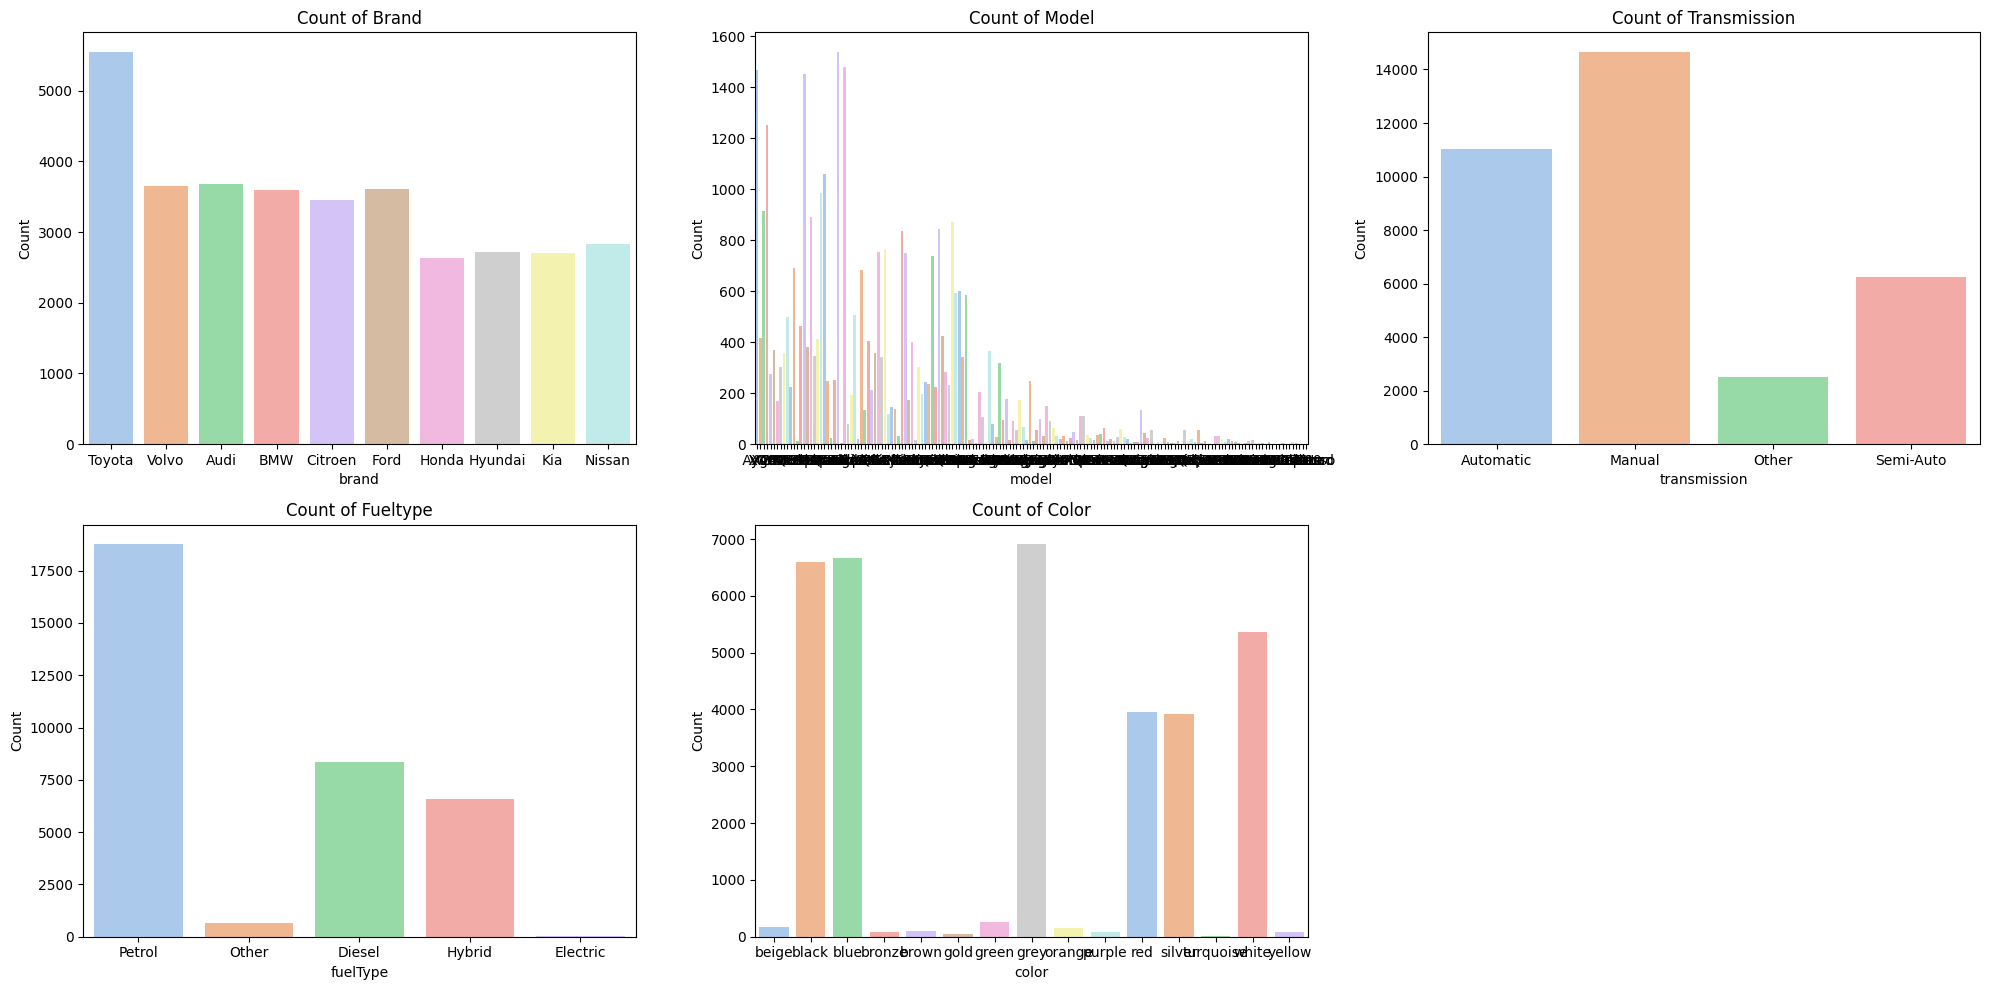

In [328]:
# Selecting categorical columns
categorical_columns = ['brand', 'model', 'transmission', 'fuelType', 'color']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Plotting bar charts
for i, column in enumerate(categorical_columns):
    if i == 5:
        break
    sns.countplot(x=df[column], ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count of {column.capitalize()}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

### Für Beziehungen zwischen numerische Features

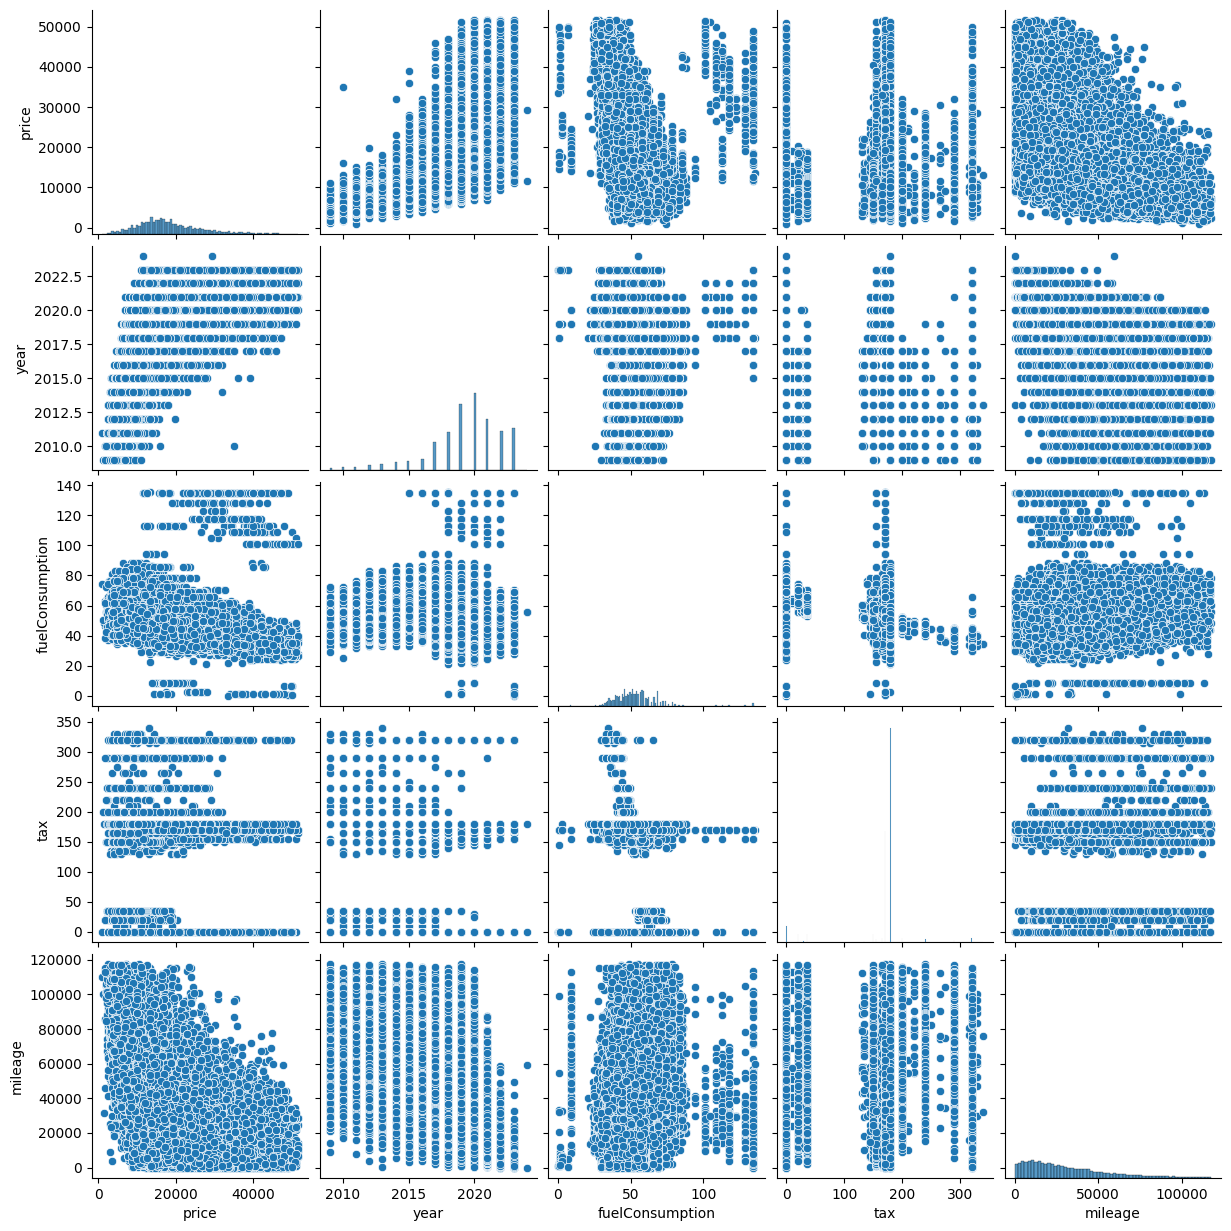

In [329]:
sns.pairplot(df[["price", "year", "fuelConsumption", "tax", "mileage"]])
plt.show()

#### Beispiele - ADD MORE

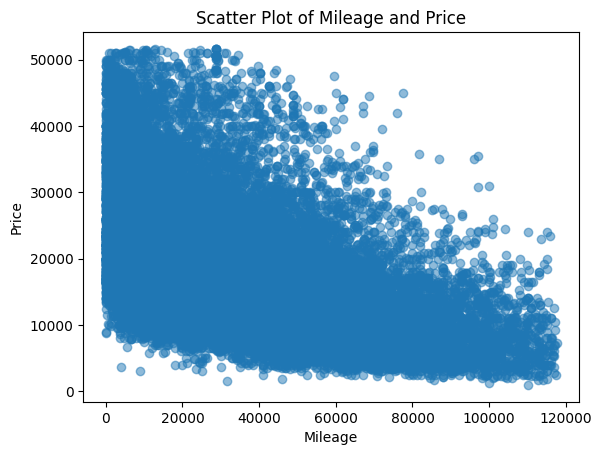

In [330]:
plt.scatter(x=df['mileage'], y=df['price'], alpha=0.5)
plt.title('Scatter Plot of Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### Beziehungen zwischen kategorische Features

#### Beispiele - ADD MORE

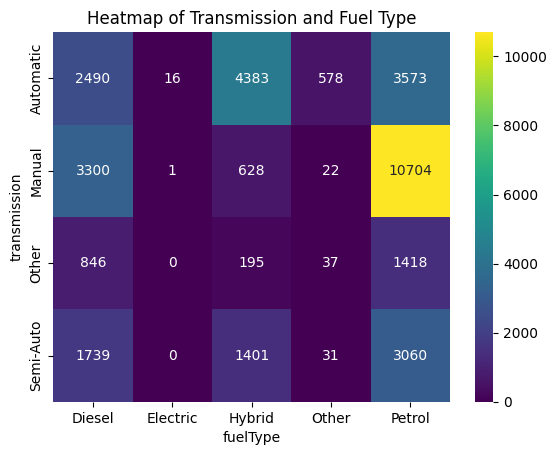

In [331]:
categorical_columns = ['brand', 'transmission', 'fuelType', 'color']

# Create a cross-tabulation
cross_tab = pd.crosstab(df['transmission'], df['fuelType'])

# Plot heatmap
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Transmission and Fuel Type')
plt.show()

### Korrelationsanalyse mithilfe der Korrelationsmatrix für numerische Features

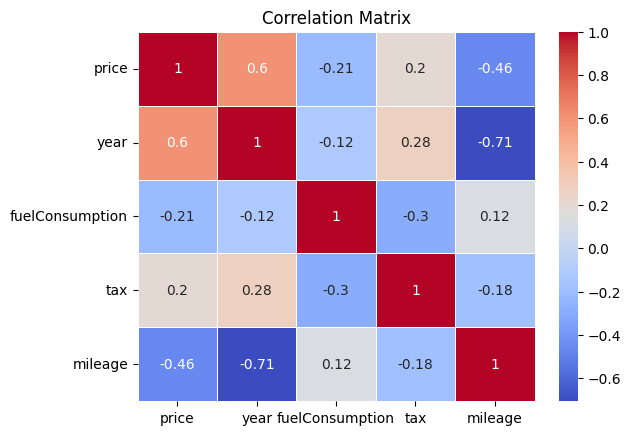

In [332]:
numerical_columns = ["price", "year", "fuelConsumption", "tax", "mileage"]

# Drop categorical columns
df_numerical = df[numerical_columns]

# Calculate and visualize correlation matrix
correlation_matrix = df_numerical.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## **Wahrscheinlichkeitsrechnung, Hypothesen und Schlussfolgerungen**

Formulieren Sie mindestens zwei Ereignisse.

* Was ist die Wahrscheinlichkeit für das Auftreten der Ereignisse?

* Was ist die Wahrscheinlichkeit für das Auftreten des ersten Ereignisses unter der Bedingung des Auftretens des zweiten Ereignisses?

* Was ist die Wahrscheinlichkeit für das Auftreten des zweiten Ereignisses unter der Bedingung des Auftretens des ersten Ereignisses?

**Ereignis A:** Das Auto ist rot.

**Ereignis B:** Die Marke des Autos ist 'Toyota'.

#### Wahrscheinlichkeit für Ereignis A
P(A) = Anzahl der roten Autos / Gesamtzahl der Autos

In [333]:
# Wahrscheinlichkeit für Ereignis A
anzahl_rote_autos = df[df['color'] == 'red'].shape[0]
print(anzahl_rote_autos)

anzahl_autos = df.shape[0]
print(anzahl_autos)

wahrscheinlichkeit_ereignis_a = anzahl_rote_autos / anzahl_autos

print("P(A) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_a, wahrscheinlichkeit_ereignis_a * 100))

3959
34422
P(A) ist 0.115014, Prozentsatz ist 11.501365%


#### Wahrscheinlichkeit für Ereignis B
P(B) = Anzahl der Autos mit der Marke 'Toyota' / Gesamtzahl der Autos

In [334]:
# Wahrscheinlichkeit für Ereignis B
anzahl_von_toyota = df[df['brand'] == 'Toyota'].shape[0]
print(anzahl_von_toyota)

anzahl_autos = df.shape[0]
print(anzahl_autos)

wahrscheinlichkeit_ereignis_b = anzahl_von_toyota / anzahl_autos

print("P(B) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_b, wahrscheinlichkeit_ereignis_b * 100))

5546
34422
P(B) ist 0.161118, Prozentsatz ist 16.111789%


#### Wahrscheinlichkeit für das Auftreten des Ereignisses A unter der Bedingung des Auftretens des Ereignisses B
P(A|B) = P(A ∩ B) / P(B)

P(A|B) = Anzahl der roten Autos mit der Marke 'Toyota' / Anzahl der Autos mit der Marke 'Toyota'

In [335]:
anzahl_von_roten_toyota = df[(df['color'] == 'red') & (df['brand'] == 'Toyota')].shape[0]
print(anzahl_von_roten_toyota)

anzahl_von_toyota = df[df['brand'] == 'Toyota'].shape[0]
print(anzahl_von_toyota)

wahrscheinlichkeit_ereignis_a_b = anzahl_von_roten_toyota / anzahl_von_toyota
print("P(A|B) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_a_b, wahrscheinlichkeit_ereignis_a_b * 100))

910
5546
P(A|B) ist 0.164082, Prozentsatz ist 16.408222%


#### Wahrscheinlichkeit für das Auftreten des Ereignisses B unter der Bedingung des Auftretens des Ereignisses A
P(B|A) = P(A ∩ B) / P(A)

P(B|A) = Anzahl der roten Autos mit der Marke 'Toyota' / Anzahl der roten Autos

In [336]:
anzahl_von_roten_toyota = df[(df['color'] == 'red') & (df['brand'] == 'Toyota')].shape[0]
print(anzahl_von_roten_toyota)

anzahl_rote_autos = df[df['color'] == 'red'].shape[0]
print(anzahl_rote_autos)

wahrscheinlichkeit_ereignis_b_a = anzahl_von_roten_toyota / anzahl_rote_autos
print("P(B|A) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_b_a, wahrscheinlichkeit_ereignis_b_a * 100))

910
3959
P(B|A) ist 0.229856, Prozentsatz ist 22.985602%


Formulieren Sie mindestens drei testbare Hypothesen auf der Grundlage Ihrer Datenuntersuchung.

* Was sind die Nullhypothesen und was sind die alternativen Hypothesen?

* Welche Hypothesen lassen sich durch einen Hypothesentest verwerfen oder bestätigen?

* Was sagen Signifikanzniveau und p-Wert über die Hypothesentests aus?

* Welche Schlussfolgerungen lassen sich ableiten?

* Wie aussagekräftig sind die Ergebnisse in welchen Grenzen?

1. Hipotez
* Null Hipotez: Kırmızı renkli araçlarla diğer renkli araçların fiyatları arasında bir fark yoktur.
* Alternatif Hipotez: Kırmızı renkli araçlar diğer renkli araçlardan daha ucuzdur.

2. Hipotez
* Null Hipotez: Petrol ve diesel araçlar arasında fiyat farkı yoktur.
* Alternatif Hipotez: Petrollü araçlar diesel araçlardan daha ucuzdur.

3. Hipotez
* Null Hipotez: Audi araçlar ile diğer marka araçların mileage/yaş değerleri arasında bir fark yoktur.
* Alternatif Hipotez: Audi araçlar diğer marka araçlardan daha yüksek mileage/yaş'a sahiptir.

4. Hipotez
* Null Hypothesis: The tax for automatic transmission cars is the same as the tax for manual transmission cars.
* Alternative Hypothesis: The tax for automatic transmission cars is different from the tax for manual transmission cars.

2.Mithilfe t-test und p-value könnten Null-Hypothese verwerfen oder bestätigen werden.

Significance Level (α):

The significance level is the probability of rejecting the null hypothesis when it is actually true.
Common choices for α are 0.05, 0.01, or 0.10.
It represents the threshold for the acceptable risk of Type I error (false positive).
A lower α indicates a more stringent criterion for rejecting the null hypothesis.

P-Value:
The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the one observed in the sample, assuming that the null hypothesis is true.
If the p-value is less than or equal to α, it provides evidence to reject the null hypothesis.
A small p-value suggests that the observed data is unlikely to occur if the null hypothesis is true.
A larger p-value suggests weak evidence against the null hypothesis.
Interpretation based on p-value and significance level:

p≤α: Reject the null hypothesis.

p>α: Fail to reject the null hypothesis.

In [337]:
from scipy import stats
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
p_values = []
t_tests = []
for i in range(0,len(df_shuffled),500):
    df_shuffledx = df_shuffled[i:i+500]
    white_cars = df_shuffledx[df_shuffledx['color'] == 'red']['price']

    other_cars = df_shuffledx[df_shuffledx['color'] != 'red']['price']
    t_stat, p_value = stats.ttest_ind(white_cars, other_cars)
    # print("T-Statistic:", t_stat)
    # print("P-Value:", f'{p_value:.70f}')
    p_values.append(f'{p_value:.10f}')
    t_tests.append(t_stat)

p_values= [float(i) for i in p_values]
average_p = sum(p_values) / len(p_values)
average_t = sum(t_tests) / len(t_tests)
print("Average P Value:",f'{average_p:.10f}')
print("Average T test value:",average_t)

print("Last iteration P-value:",p_value)

Average P Value: 0.1877601404
Average T test value: -1.8948249192560538
Last iteration P-value: 0.8699795821892


In [338]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
p_values = []
t_tests = []
for i in range(0,len(df_shuffled),500):
    df_shuffledx = df_shuffled[i:i+500]
    white_cars = df_shuffledx[df_shuffledx['fuelType'] == 'Petrol']['price']

    other_cars = df_shuffledx[df_shuffledx['fuelType'] == 'Diesel']['price']
    t_stat, p_value = stats.ttest_ind(white_cars, other_cars)
    # print("T-Statistic:", t_stat)
    # print("P-Value:", f'{p_value:.70f}')
    p_values.append(f'{p_value:.10f}')
    t_tests.append(t_stat)

p_values= [float(i) for i in p_values]
average_p = sum(p_values) / len(p_values)
average_t = sum(t_tests) / len(t_tests)
print("Average P Value:",f'{average_p:.10f}')
print("Average T test value:",average_t)

print("Last iteration P-value:",p_value)

Average P Value: 0.1737656101
Average T test value: -1.7388046498621157
Last iteration P-value: 0.2505166179842985


In [339]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
p_values = []
t_tests = []
for i in range(0,len(df_shuffled),500):
    df_shuffledx = df_shuffled[i:i+500]
    
    car_ages = 2024-df_shuffledx['year']
    white_cars = df_shuffledx[df_shuffledx['brand'] == 'Audi']['mileage']
    white_cars = white_cars / car_ages
    other_cars = df_shuffledx[df_shuffledx['brand'] != 'Audi']['mileage']
    other_cars = other_cars/car_ages

    t_stat, p_value = stats.ttest_ind(white_cars, other_cars)
    # print("T-Statistic:", t_stat)
    # print("P-Value:", f'{p_value:.70f}')
    p_values.append(f'{p_value:.10f}')
    t_tests.append(t_stat)

p_values= [float(i) for i in p_values]
average_p = sum(p_values) / len(p_values)
average_t = sum(t_tests) / len(t_tests)
print("Average P Value:",f'{average_p:.10f}')
print("Average T test value:",average_t)

print("Last iteration P-value:",p_value)

Average P Value: nan
Average T test value: nan
Last iteration P-value: nan


In [340]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
p_values = []
t_tests = []
for i in range(0,len(df_shuffled),500):
    df_shuffledx = df_shuffled[i:i+500]
    white_cars = df_shuffledx[df_shuffledx['transmission'] == 'Manual']['tax']

    other_cars = df_shuffledx[df_shuffledx['transmission'] == 'Automatic']['tax']
    t_stat, p_value = stats.ttest_ind(white_cars, other_cars)
    # print("T-Statistic:", t_stat)
    # print("P-Value:", f'{p_value:.70f}')
    p_values.append(f'{p_value:.10f}')
    t_tests.append(t_stat)

p_values= [float(i) for i in p_values]
average_p = sum(p_values) / len(p_values)
average_t = sum(t_tests) / len(t_tests)
print("Average P Value:",f'{average_p:.10f}')
print("Average T test value:",average_t)

print("Last iteration P-value:",p_value)

Average P Value: 0.1810980339
Average T test value: -1.6233123496351027
Last iteration P-value: 0.09280745917805495


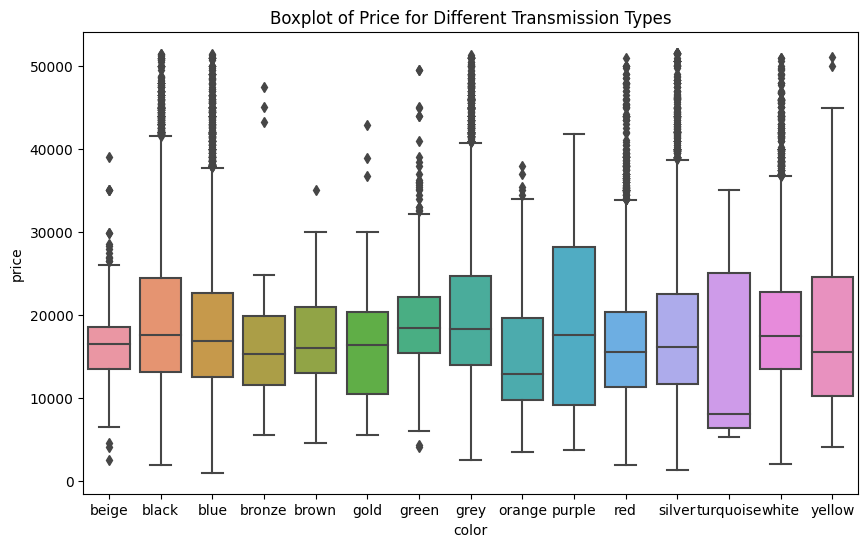

In [341]:
# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=df)
plt.title('Boxplot of Price for Different Transmission Types')
plt.show()

In [342]:

# For ANOVA (if comparing all colors)
# Perform ANOVA test
anova_result = stats.f_oneway(*[df[df['color'] == color]['price'] for color in df['color'].unique()])
print("ANOVA test result:", anova_result)

# For t-test (if specifically comparing white cars with others)
# Creating two groups: white cars and non-white cars
red_cars = df[df['color'] == 'red']['price']
other_cars = df[df['color'] != 'red']['price']

# Perform t-test
t_test_result = stats.ttest_ind(red_cars, other_cars, equal_var=False)
print("T-test result:", t_test_result)

ANOVA test result: F_onewayResult(statistic=39.242551737850114, pvalue=2.4393995433063503e-107)
T-test result: Ttest_indResult(statistic=-17.457143965510877, pvalue=1.9761173859863458e-66)


In [343]:
dfx = df.drop(columns=['variant','model'])
X = pd.get_dummies(dfx, columns=dfx.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
print(X.shape)
X.head()
dfx.info()

(34422, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34422 entries, 0 to 37146
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            34422 non-null  object 
 1   price            34422 non-null  int64  
 2   year             34422 non-null  float64
 3   transmission     34422 non-null  object 
 4   fuelConsumption  34422 non-null  float64
 5   tax              34422 non-null  float64
 6   mileage          34422 non-null  float64
 7   fuelType         34422 non-null  object 
 8   color            34422 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 2.6+ MB


In [344]:
# Assuming 'df' is your DataFrame with the car-related data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_encoded = pd.get_dummies(df, columns=['transmission', 'fuelType'], drop_first=True)

dfx = df.drop(columns=['variant'])
X = pd.get_dummies(dfx, columns=dfx.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)

# Features (X) and target variable (y)
# X = df_encoded[['year', 'mileage', 'tax', 'fuelConsumption','transmission_Manual','transmission_Other','transmission_Semi-Auto','fuelType_Electric','fuelType_Hybrid','fuelType_Other','fuelType_Petrol']]  # Include relevant features
y = dfx['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)

# Decision Trees
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Model Evaluation
def evaluate_model(predictions, y_true):
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    return mse, r2

linear_reg_mse, linear_reg_r2 = evaluate_model(linear_reg_predictions, y_test)
decision_tree_mse, decision_tree_r2 = evaluate_model(decision_tree_predictions, y_test)

print("Linear Regression - MSE: {}, R^2: {}".format(linear_reg_mse, linear_reg_r2))
print("Decision Trees - MSE: {}, R^2: {}".format(decision_tree_mse, decision_tree_r2))

Linear Regression - MSE: 6.77536866712841e-22, R^2: 1.0
Decision Trees - MSE: 525.1217138707335, R^2: 0.9999931207004352


In [345]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Assuming 'df_encoded' is your DataFrame with the encoded features
# Replace 'df_encoded' with the actual name of your DataFrame

# Assuming 'target_column' is the column you want to predict
# Replace 'target_column' with the actual name of your target column


dfx = df.drop(columns=['variant'])
X = pd.get_dummies(dfx, columns=dfx.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)

# Features (X) and target variable (y)
# X = df_encoded[['year', 'mileage', 'tax', 'fuelConsumption','transmission_Manual','transmission_Other','transmission_Semi-Auto','fuelType_Electric','fuelType_Hybrid','fuelType_Other','fuelType_Petrol']]  # Include relevant features
y = dfx['price']

# Standardize the features (important for KNN and Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# 2. Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred_nb = naive_bayes_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# 3. Neural Network (Multilayer Perceptron)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_classifier.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)

KNN Accuracy: 0.01989832970225127


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train.shape

(27537, 35)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model.add(Dense(10,activation='sigmoid'))

#Outputlayer mit einem Neuronen
model.add(Dense(1))


model.compile(optimizer=Adam(0.001), loss='mse')

In [ ]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=100)

Epoch 1/100
108/108 [==============================] - 0s 2ms/step - loss: 426745632.0000 - val_loss: 427659712.0000
Epoch 2/100
108/108 [==============================] - 0s 953us/step - loss: 426709888.0000 - val_loss: 427630048.0000
Epoch 3/100
108/108 [==============================] - 0s 963us/step - loss: 426680768.0000 - val_loss: 427601024.0000
Epoch 4/100
108/108 [==============================] - 0s 935us/step - loss: 426651904.0000 - val_loss: 427572288.0000
Epoch 5/100
108/108 [==============================] - 0s 925us/step - loss: 426623360.0000 - val_loss: 427543616.0000
Epoch 6/100
108/108 [==============================] - 0s 944us/step - loss: 426594976.0000 - val_loss: 427514944.0000
Epoch 7/100
108/108 [==============================] - 0s 953us/step - loss: 426566528.0000 - val_loss: 427486496.0000
Epoch 8/100
108/108 [==============================] - 0s 953us/step - loss: 426538112.0000 - val_loss: 427457984.0000
Epoch 9/100
108/108 [=============================

In [ ]:
yn_train_pred = model.predict(X_train)
yn_test_pred = model.predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

216/216 [==============================] - 0s 456us/step
Trainingsdaten
MAE:  18627.535167559025
MSE:  423928862.40607226
RMSE:  20589.532836032784
R2:  -4.509591214805168

Testdaten
MAE:  18713.690141144576
MSE:  424851123.39717966
RMSE:  20611.91702382822
R2:  -4.691322749974461


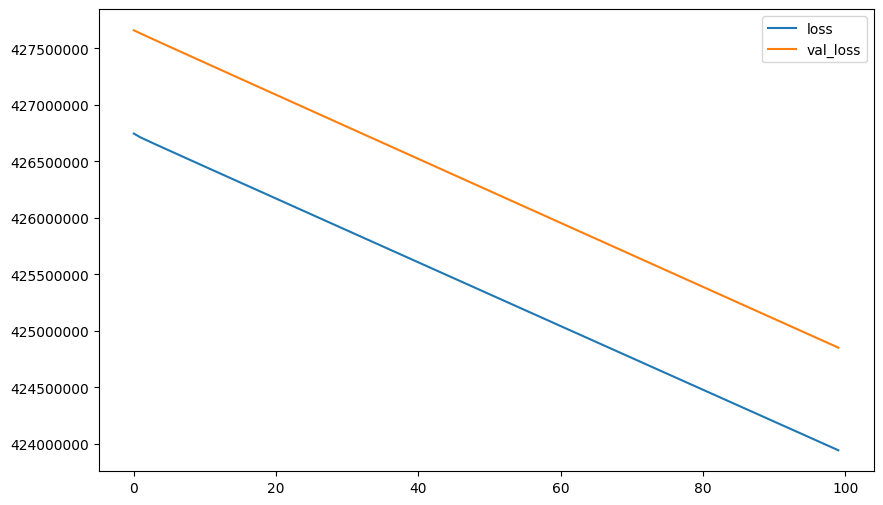

In [ ]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [346]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    roc_auc_score,
)

In [347]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [349]:
def outliers(reff, col):
  Q1 = reff[col].quantile(0.25)  # 25th quantile
  Q3 = reff[col].quantile(0.75)  # 75th quantile
  IQR = Q3 - Q1
  Lower_Whisker = Q1 - 1.5 * IQR
  Upper_Whisker = Q3 + 1.5 * IQR
  reff[col] = np.clip(reff[col], Lower_Whisker, Upper_Whisker)

  return reff

def treat_outliers(ref, col_list):

    for c in col_list:
        ref = outliers(ref, c)

    return ref

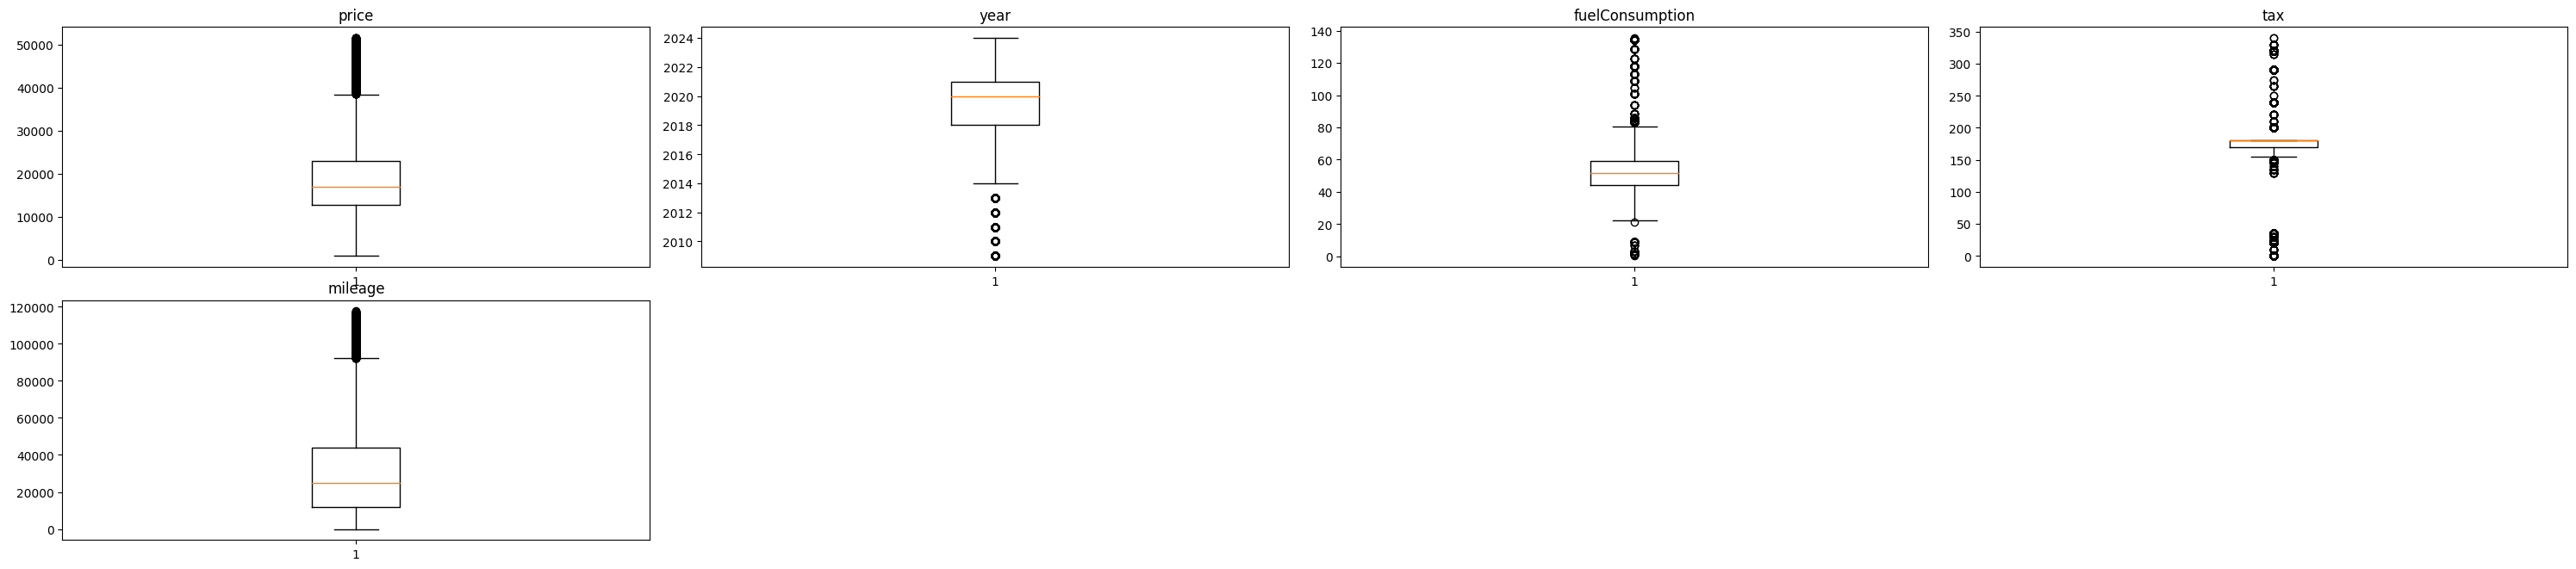

In [350]:
plt.figure(figsize=(30, 16))
for i, var in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

In [351]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df6 = treat_outliers(df, numerical_col)

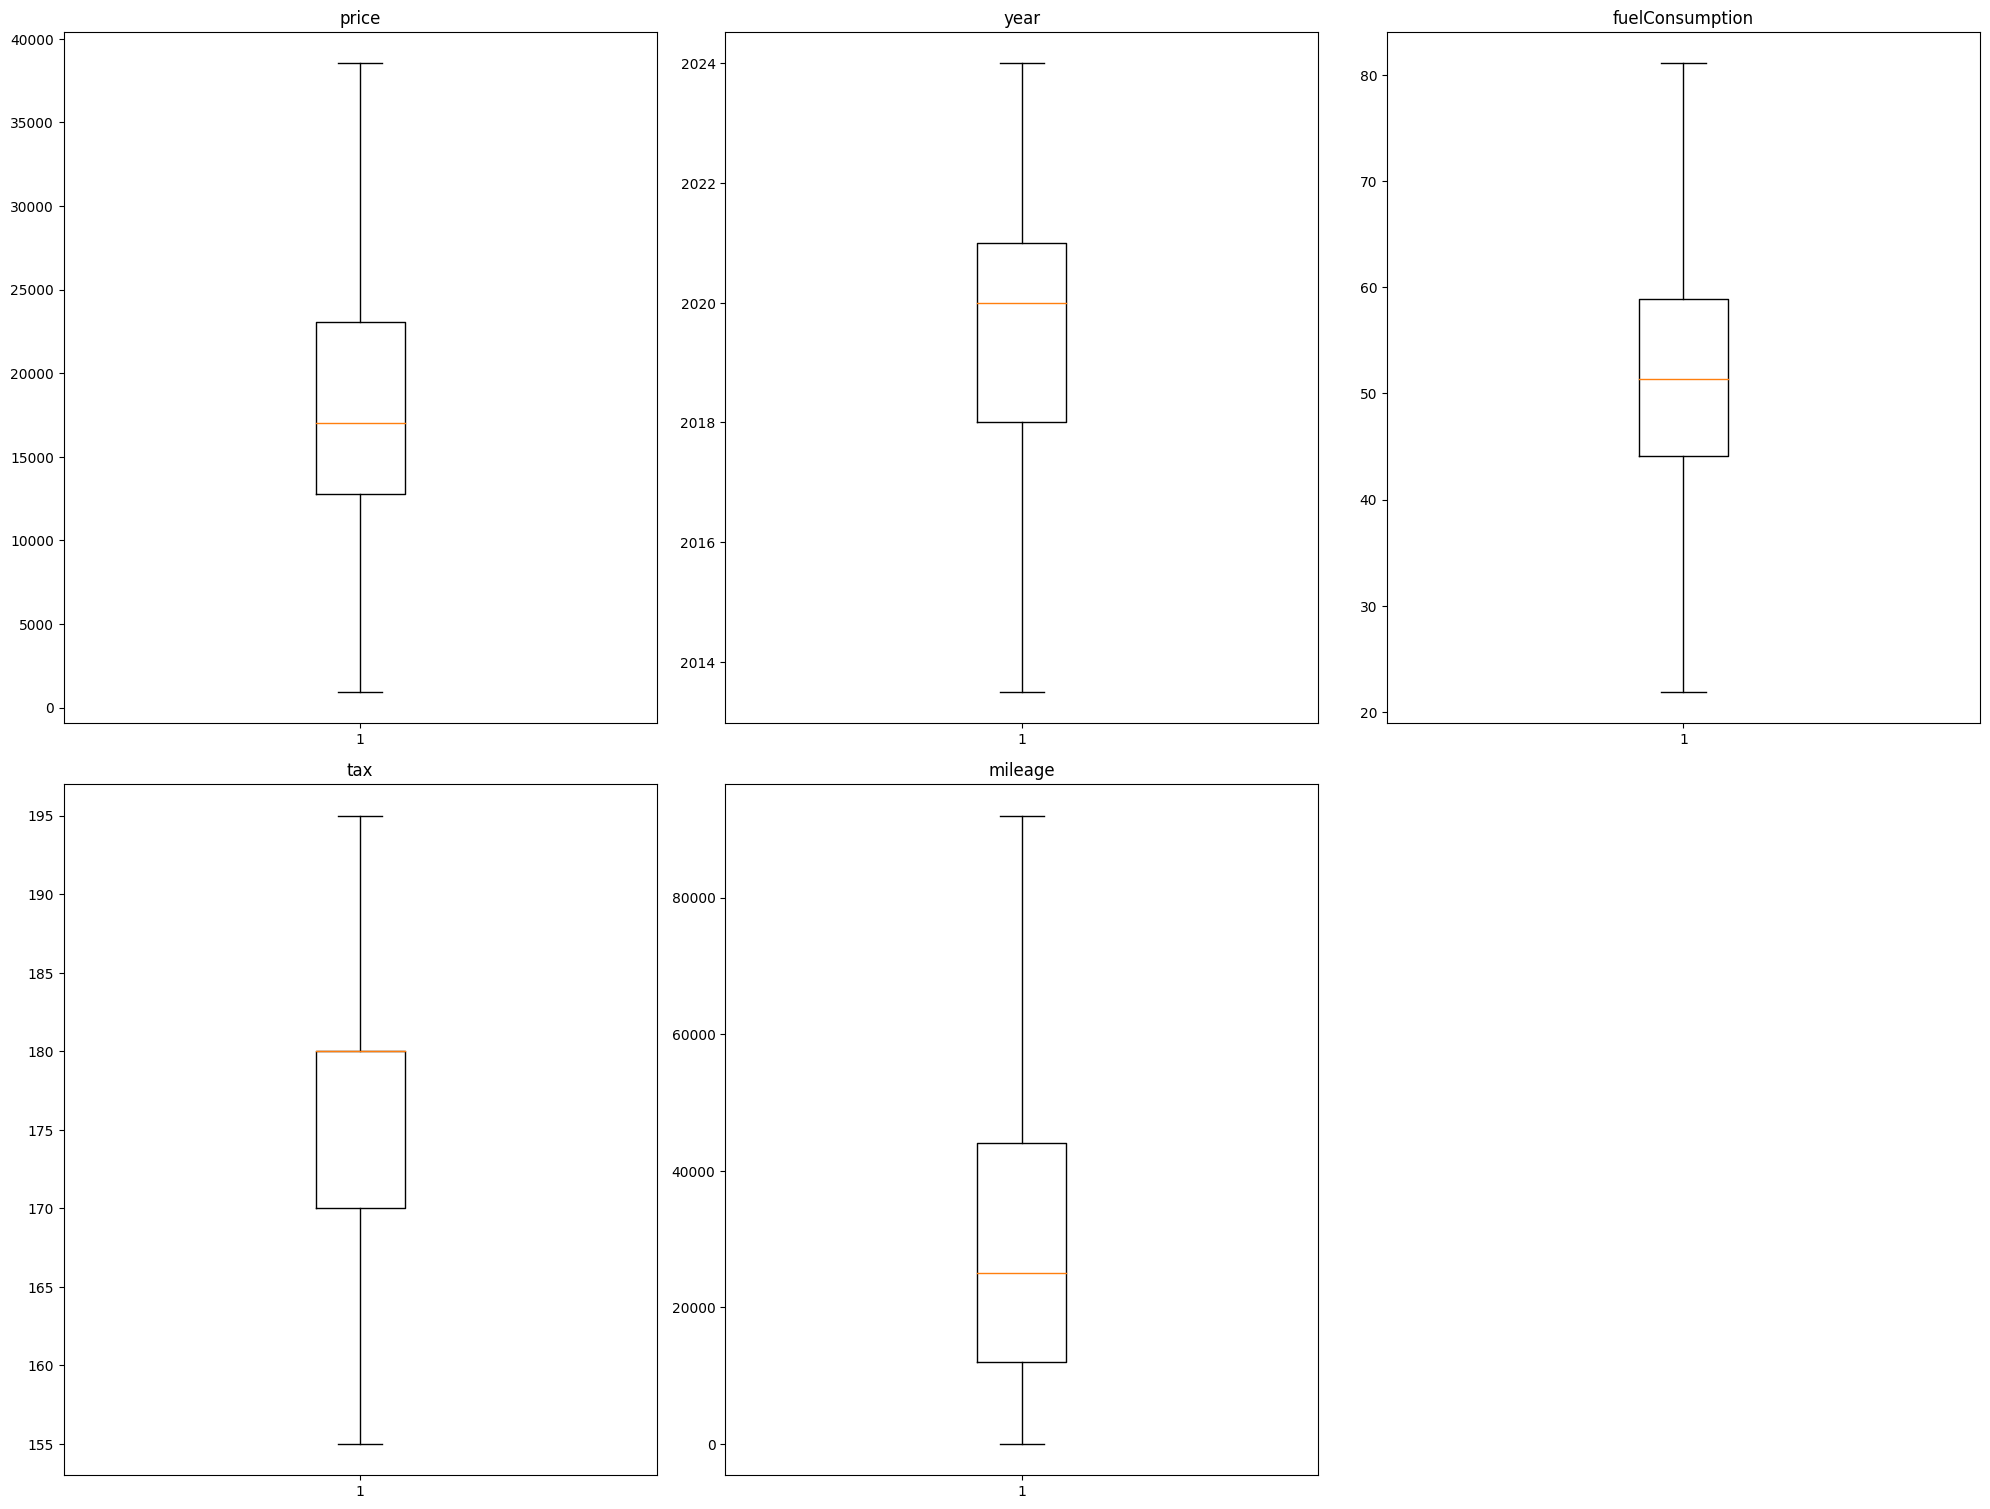

In [352]:
plt.figure(figsize=(20, 30))
for i, variable in enumerate(numerical_col):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df6[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [358]:
dfx = df.drop(columns=['price','variant','model','tax','mileage'])
X = pd.get_dummies(dfx, columns=dfx.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)

# Features (X) and target variable (y)
# X = df_encoded[['year', 'mileage', 'tax', 'fuelConsumption','transmission_Manual','transmission_Other','transmission_Semi-Auto','fuelType_Electric','fuelType_Hybrid','fuelType_Other','fuelType_Petrol']]  # Include relevant features
y = df['price']
X.head()

,year,fuelConsumption,brand_BMW,brand_Citroen,brand_Ford,brand_Honda,brand_Hyundai,brand_Kia,brand_Nissan,brand_Toyota,...,color_gold,color_green,color_grey,color_orange,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow
0,2022.0,56.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2023.0,56.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2022.0,58.9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2023.0,56.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2022.0,57.7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [359]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25816
Number of rows in test data = 8606


In [360]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [361]:
pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), index = X_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])

,Coefficients
year,1.665401e+03
fuelConsumption,-1.875206e+02
brand_BMW,-1.329739e+03
brand_Citroen,-6.038722e+03
brand_Ford,-5.021919e+03
brand_Honda,-3.803531e+03
brand_Hyundai,-6.597430e+03
brand_Kia,-5.412841e+03
brand_Nissan,-6.551794e+03
brand_Toyota,-4.934632e+03


In [362]:
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, X_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3977.721098,3009.21401,0.767187,0.766898,18.495136


In [363]:
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3972.278533,2981.707442,0.765435,0.764559,18.404512
